## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print('Missing values:', X.columns.isnull().any())
pd.DataFrame({'Unique values': X.nunique(), 'Type': X.dtypes})

Missing values: False


,Unique values,Type
alcohol,126,float64
malic_acid,133,float64
ash,79,float64
alcalinity_of_ash,63,float64
magnesium,53,float64
total_phenols,97,float64
flavanoids,132,float64
nonflavanoid_phenols,39,float64
proanthocyanins,101,float64
color_intensity,132,float64


Можем понять, что в фрейме нет пустых значений, а все признаки - числовые, так как имеют очень много уникальных числовых значений, причем тип float имеют все колонки. Поэтому категориальных признаков нет, и кодировать, соответственно, нечего

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Кто понял отсылку к сиду, тому респект. Последняя цифра не влезает в int32 :((

In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(481516234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0
99,12.29,3.17,2.21,18.0,88.0,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train_norm = pd.DataFrame(normalizer.fit_transform(X_train[['alcohol', 'magnesium']]))
X_test_norm = pd.DataFrame(normalizer.fit_transform(X_test[['alcohol', 'magnesium']]))

nn = [1, 3, 5, 10, 15, 25]
classifiers = [KNeighborsClassifier(n_neighbors=i, p=2, n_jobs=10) for i in nn]

print('NN \t Train \t Test')
for clf in classifiers:
    clf.fit(X_train_norm, y_train)

    predict_train = clf.predict(X_train_norm)
    acc_train = np.mean(predict_train == y_train).round(2)

    predict_test = clf.predict(X_test_norm)
    acc_test = np.mean(predict_test == y_test).round(2)

    print(f'{clf.n_neighbors} \t {acc_train} \t {acc_test}')

NN 	 Train 	 Test
1 	 1.0 	 0.67
3 	 0.85 	 0.63
5 	 0.81 	 0.69
10 	 0.77 	 0.61
15 	 0.74 	 0.67
25 	 0.7 	 0.7


Пояснение к полученным точностям будет вместе с графиком в след пункте

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

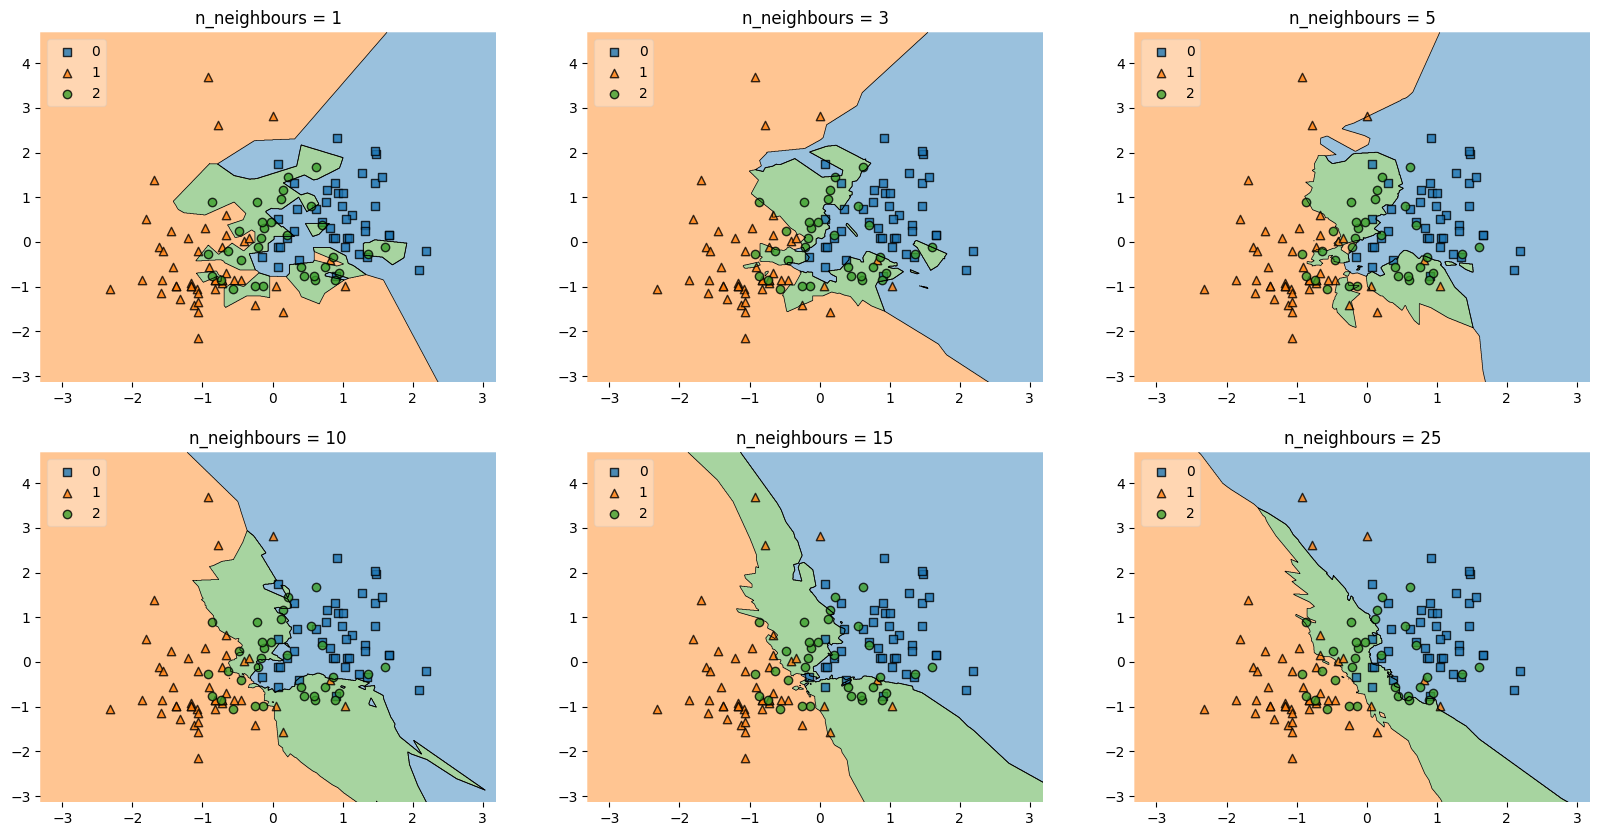

In [6]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20, 10))

for k, clf, grd in zip(nn, classifiers, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train_norm), y=y_train, clf=clf, legend=2)
    plt.title(f'n_neighbours = {k}')

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

На моем ноуте график строился 3.5 минуты, "придется немного подождать" KekW. Я думал на knn-тяге долетит до Марса, но вроде жив

Как можно заметить, точность на тренировочной выборке сильно больше чем на тестовой, что является признаком "переобучения". Однако она падает с ростом числа соседей $k$, и при $k = 25$ точности сравниваются. Небольшое различие в ошибке на тестовой и тренировочной сигнализирует о какой-никакой, но оптимальности гиперпараметра k. В данной задаче считаю $k = 15$ или $k = 25$ наиболее оптимальными. С кайфом наверное будет работать и $k = 20$ (среднее между двумя). Если же нужно выбирать именно среди этих двух, я бы отдал предпочтение 25 

В подтверждение посмотрим на эти прекрасные (но не для ноутбука) решающие поверхности выше. Для маленьких $k$ поверхности как бы подстраиваются под маленькие группки объектов и видно характерные островки, а для knn это харам. С ростом $k$ они начинают сливаться и при уже описанных выше значениях видно адекватные решающие поверхности без резких отростков, где четко видно разграничение

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

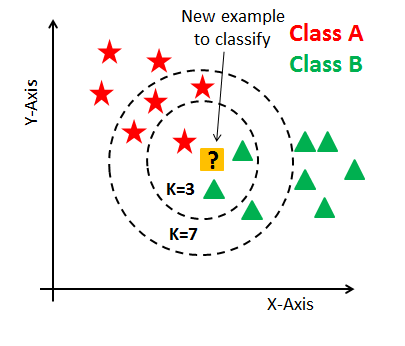

В прошлом ДЗ я в ласт задании реализовывал свой knn и думал что я фрик, но видимо не фрик, и сделал умом. Так что здесь будет модифицированная копипаста с прошлого дз :)

Только здесь нельзя менять тесты, то есть метрика должна быть одна. Так как не оговорено какая, буду юзать Евклидову

На всякий случай вставлю пояснение с прошлой домашки: 

> Теперь реализуем функцию предсказания. Для этого подойдет мега удобная функция `np.argpartition`, храни ее Господь. Она работает по приципу начального этапа quick sort: ставит опорный элемент в нужный слот и все элементы меньше него - слева. Так мы сможем найти k ближайших соседей (их индексы) за O(N), а не пихать все в heap

In [7]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k: int):
        self.k = k
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.apply_along_axis(self.__predict_single, 1, X)

    def __predict_single(self, item: np.ndarray) -> int:
        distances = np.apply_along_axis(lambda x: np.linalg.norm(item - x), 1, self.X_train)
        knn_indexes = np.argpartition(distances, self.k)[:self.k]
        knn_values = np.take(self.y_train, knn_indexes, 0)
        res = Counter(knn_values).most_common(1)[0][0]
        return res

In [8]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train =  np.array([[1, 1], [2, 2]])
    y_train =  np.array([0, 1])
    X_test =  np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [9]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

Все тесты прошли, сюда лут

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [10]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [12]:
data.columns.isnull().any()

False

Пустых значений опять нет, они хоть раз будут в домашке?

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Появился столбец `Unnamed: 0`, который скорее всего возник при ошибке парсинга csv (в самой csv-шке заданы явно индексы строк, но pandas делает их за нас). Так как сдвиг индексов на 1 не роляет, удалим этот столбец. В целом можно было бы явно указать этот столбец как индексовый, но ничего критично бы не поменялось

In [11]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [12]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Чем ближе признаки коррелируют, тем ближе числовое значение к единице. Лучше всего с ценой бриллианта коррелируют `carat`(количество карат, собственно), а также `x, y, z` - размеры бриллианта. Коэффицент их корреляции очень высок

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

Категориальные признаки - `cut,clarity` и `color`. Посмотрим на их уникальные значения. Это делать необязательно, поэтому не баньте за `for` пжпжпж

In [13]:
categ = ['cut', 'clarity', 'color']

for attr in categ:
    print(attr, ':', data[attr].unique())

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']


Из описания датасета можем понять, что все эти признаки - так или иначе являются порядковыми, потому что их можно отранжировать от лучшего к худшему. Но это сейчас не важно, так как по заданию они формально считаются категориальными. Нам нужно только закодировать их OneHot. Для этого воспользуемся, например, dummy-кодированием в pandas

In [14]:
categ_dummies = pd.get_dummies(data[categ], drop_first=True)
data = pd.concat([data.drop(categ, axis=1), categ_dummies], axis=1)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

np.random.seed(481516234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

test_predict = lr.predict(X_test)
train_predict = lr.predict(X_train)

print("Test MSE:", mean_squared_error(y_test, test_predict))
print("Train MSE:", mean_squared_error(y_train, train_predict))

Test MSE: 1284893.5920295473
Train MSE: 1274281.510498007


Как мы видим, хоть ошибка на тестовой выборке и больше, но не намного (относительно ее самой). Можно считать, что ошибка примерно одинакова

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [19]:
pd.DataFrame({'Feature': X.columns, 
              'Weight': lr.coef_.round(2)})

,Feature,Weight
0,carat,5341.04
1,depth,-95.36
2,table,-49.02
3,x,-1163.59
4,y,15.04
5,z,-23.10
6,cut_Good,162.05
7,cut_Ideal,403.02
8,cut_Premium,324.13
9,cut_Very Good,299.27


Вещественные переменные - первые 6. Как мы видим, у вещественных признаков `depth, table, y, z` порядок весов - десятки. У параметра `x` и `carat` - тысячи. Оценки коэффов этих двух признаков значительно превышают (по модулю), другие вещественные признаки. Это может говорить о том, что либо некоторые признаки не нужны, либо между ними сильная корреляция

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [20]:
from sklearn.linear_model import Lasso, Ridge

lasso, ridge = Lasso(10.0), Ridge(10.0)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

pd.DataFrame({'Feature': X.columns, 
               'No regularization': lr.coef_.round(2), 
               'Lasso': lasso.coef_.round(2), 
               'Ridge': ridge.coef_.round(2)})

,Feature,No regularization,Lasso,Ridge
0,carat,5341.04,4840.32,5301.24
1,depth,-95.36,-103.78,-93.49
2,table,-49.02,-60.11,-49.16
3,x,-1163.59,-698.52,-1119.34
4,y,15.04,-0.00,12.20
5,z,-23.10,-17.06,-26.81
6,cut_Good,162.05,37.40,162.65
7,cut_Ideal,403.02,194.89,404.17
8,cut_Premium,324.13,134.86,325.10
9,cut_Very Good,299.27,127.15,300.59


Видим, что при использовании L2-регуляризации коэффиценты при вещественных признаках хоть и уменьшились, но прям совсем на чуть чуть. 

Однако при использовании L1-регуляризации коэффиценты заметно снизились, как раз, у `carat` и `x` (ну разве что у `carat` абсолютное изменение большое, но относительное сильно меньше, чем у `x`). Еще интересно отметить, что веса у некоторых признаков занулились. Это связано с интересной фичей L1-регуляризации занулять некоторые веса для "ненужных" признаков

Скорее всего, мультиколлинеарность между вещественными признаками действительно имела место, так как при использовании L1-регуляризации, которая гораздо сильнее штрафует за мультиколлинеарность (чем ближе абсолютное значение веса признака к 0, тем менее важным он является $\rightarrow$ возможно коррелирует с другим), веса уменьшились (а где-то занулились)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

Ща опять заюзаю `for`, но без него тут вроде никак. Наверное можно написать как-то по-гигачадовски, но это будет нечитаемо и не факт что ощутимо быстрее

In [21]:
alphas = np.array([0.1, 1, 10, 100, 200])
norm_lasso = []
norm_ridge = []

for a in alphas:
    lasso, ridge = Lasso(a), Ridge(a)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    norm_lasso.append(np.linalg.norm(lasso.coef_))
    norm_ridge.append(np.linalg.norm(ridge.coef_))

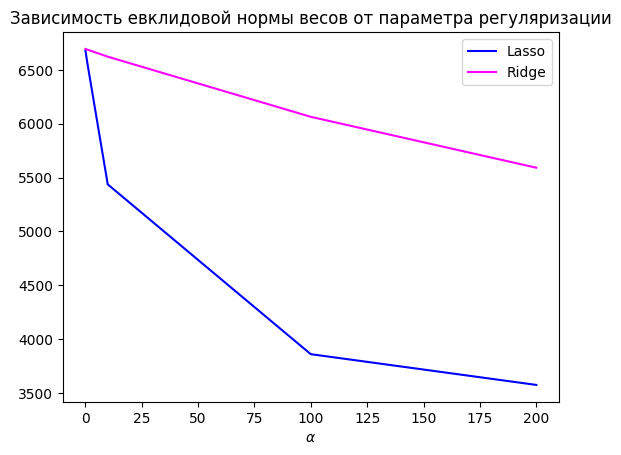

In [22]:
plt.title('Зависимость евклидовой нормы весов от параметра регуляризации')
plt.plot(alphas, norm_lasso, 
            label='Lasso', color='blue')
plt.plot(alphas, norm_ridge, 
            label='Ridge', color='magenta')

plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

Как мы видим, при Lasso-регрессии с ростом $\alpha$ евклидовая норма вектора весов и, следовательно, сами веса, уменьшаются гораздо быстрее, чем при Ridge-регрессии.

Lasso-регрессию используют для отбора признаков, потому что ненужные признаки они попросту зануляет и из-за этого как раз норма весов гораздо быстрее уменьшается 

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [23]:
from sklearn.linear_model import LassoCV
alphas = np.array([0.1, 1, 10, 100, 200])

lcv = LassoCV(alphas=alphas, cv=5, n_jobs=10)

lcv.fit(X_train, y_train);

In [24]:
errors = np.mean(lcv.mse_path_, axis=1).astype(int)
pd.DataFrame({'Alpha': lcv.alphas_, 
              'Average MSE': errors})

,Alpha,Average MSE
0,200.0,2149702
1,100.0,1784740
2,10.0,1338145
3,1.0,1279820
4,0.1,1280186


Видим, что среднее значение ошибки для $\alpha = 1, 0.1$ получились примерно одинаковыми. Но все же наименьшая ошибка (в среднем) - при $\alpha = 1$, поэтому возьму ее

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [25]:
l_best = Lasso(1.0)
l_best.fit(X_train, y_train)

pd.DataFrame({'Feature': X.columns,
              'Weight (a = 100)': l_best.coef_.round(2)})

,Feature,Weight (a = 100)
0,carat,5291.20
1,depth,-96.56
2,table,-50.21
3,x,-1106.11
4,y,0.00
5,z,-20.55
6,cut_Good,149.89
7,cut_Ideal,382.64
8,cut_Premium,305.44
9,cut_Very Good,282.54


Чем больше по модулю веса - тем больше вклад какого-то признака в стоимость. При описании информативность(вклад, важность и другие синонимичные слова) буду оценивать именно так

Как мы можем заметить, основной вклад в стоимость вносит карат бриллианта, а также его горизонтальный размер (`x`). Так как форма бриллиантов примерно одна и та же, то другие 2 размера всегда связаны с `x` ($\Rightarrow$ коррелируют с ним) и они не вносят вклад. `y` вообще имеет нулевой вес $\Rightarrow$ скорее всего напрямую зависит от `x`

Также почти не вносят вклады `depth` и `table`, так как они тоже характеризуют размеры бриллианта (причем `depth` зависит от `x, y, z`). То есть, цена в зависимости от размера практически полностью определяется только продольным размером `x`

Что касается порядковых (категориальных) признаков, `cut` и `clarity` вносят вклад, но небольшой (порядок весов - сотни). Наверное, цвет и качество огранения не сильно ценятся у ювелиров

А вот уже `clarity` достаточно важен, порядок их весов - тысячи. Действительно, чем чище алмаз - тем больше он похож на алмаз, а не на рандомный камушек с пляжа Анапа 2012

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [26]:
print('Test MSE =', mean_squared_error(y_test, l_best.predict(X_test)))
print('Train MSE =', mean_squared_error(y_train, l_best.predict(X_train)))  # вроде это не надо, но на всякий
print('Точность:', l_best.score(X_test, y_test))  # чисто ради интереса

Test MSE = 1285781.7272131245
Train MSE = 1274900.0537914918
Точность: 0.9199844653061251


Ошибка с регуляризацией и без получилась одна и та же (разница буквально десятые доли процента). Как будто-бы разницы какую модель использовать - нет. Но все же имхо лучше всегда использовать хоть какую-то регуляризацию, чтобы бороться с переобучением. На даннном датасете такой проблемы не было, поэтому точность моделей получилась одинаковой. Но мы просто лаки, в других задачах будет не все так сладко